#INTRODUCTION

The Console wars. The epic battles fought ( and still being fought) amongst the biggest and baddest players in the console gaming industry. This notebook will focus on the 7th Generation and the 8th Generation of the Console wars and the belligerents are as follows : 

**7th GENERATION** : Playstation 3 vs XBOX360 vs Nintendo Wii

**8th GENERATION** : Playstation 4 vs XBOXONE vs Nintendo WiiU

The aim is to run some visualisations on how some of the features in the dataset are correlated to one another as well as to provide some summary statistics such as the choice of genres and overall sales made by the different consoles to observe which one emerges with bragging rights. 

In [1]:
# Import the relevant libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from brewer2mpl import qualitative

Let's load the video game sales data as "video" and explore the first 5 rows 

In [2]:
video = pd.read_csv('../input/Video_Games_Sales_as_at_22_Dec_2016.csv')
video.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(video.shape)

(16719, 16)


# GENERAL ANALYSIS & DATA CLEANSING

Before we start delving into the visuals and stats for the 7th Gen and 8th Gen console wars, let's run some general data analysis as well as statistics to get a feel for what we have. Let's start by checking if there exists any nulls in the dataframe by calling the method "isnull().any()" as such:

In [4]:
video.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

Well well, let's start by getting rid of the nulls via the "dropna" call

In [5]:
video = video.dropna(axis=0)

By calling the dataframe method "info()", we also discover that the "User_Score" column which should be best represented numerically, contains strings. Therefore we convert that column type to string:

In [6]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [7]:
# Conversion of "User_Score" Column from Str to Numeric
video['User_Score'] = video.User_Score.convert_objects(convert_numeric=True)
# SIDE-NOTE: use pd.to_numeric. I was copying what I had written locally on my machine and it seems I have an old pandas version and therefore no pd.to_numeric

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Let's look at the different platforms that we have on our hands

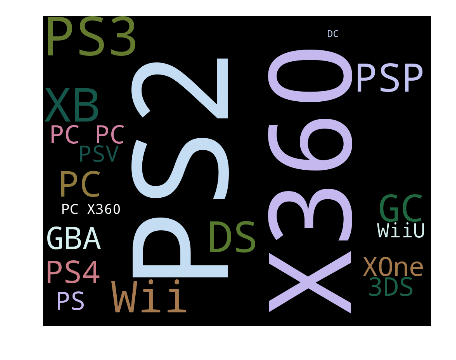

In [8]:
from wordcloud import WordCloud, STOPWORDS
# Generating the wordcloud with the values under the Platform feature
platform = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(video['Platform'].values))
plt.imshow(platform.recolor( colormap= 'cubehelix' , random_state=0), alpha=1)
plt.axis('off')
plt.show()

As one can see, there are quite a few different platforms in our dataset and this is more than required in (as we want only the 7th and 8th Generational consoles). Therefore we have to undertake some selective trimming of the data. However we will get to that part in due time.

## Jointplots and Correlations of the numeric features

Now, lets plot some of the numeric features against each other to explore the relations between them and in the meanwhile get accustomed to using Seaborn's joinplot capabilities. I therefore first plot the "Critic_Score" and "User_Score" columns first to see how they interact:

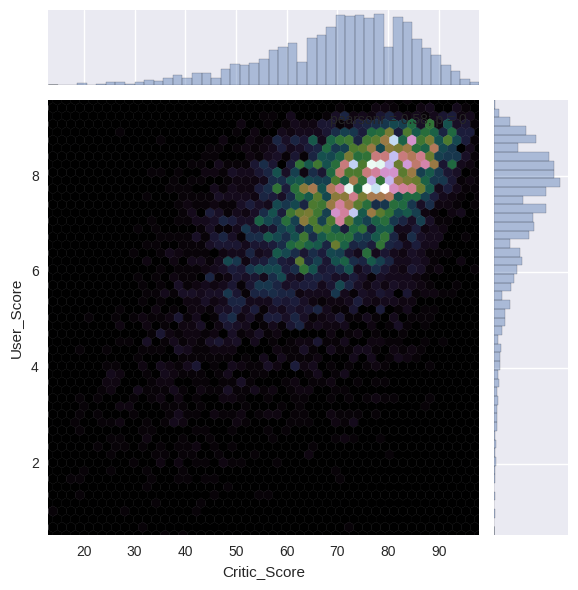

In [9]:
sns.jointplot(x='Critic_Score',y='User_Score',data=video,kind='hex', cmap= 'cubehelix', size=6)
#video.plot(y= 'Critic_Score', x ='User_Score',kind='hexbin',gridsize=35, sharex=False, colormap='afmhot_r', title='Hexbin of Critic_Score and User_Score')

As expected, these 2 scores exhibit quite positive Pearson Correlation with one another. This should not be a surprise as on average, if a game is good, both the critic and the user will derive enjoyment out of it and therefore tend to score the game higher and vice-versa. Let's now look at "Critic_Count" and "Critic_Score"

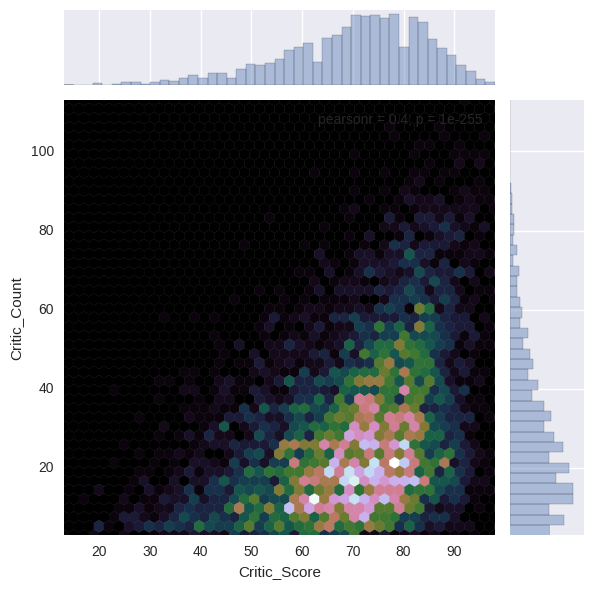

In [10]:
sns.jointplot('Critic_Score','Critic_Count',data=video,kind='hex', cmap='cubehelix', size=6)
#video.plot(y= 'Critic_Score', x ='Critic_Count',kind='hexbin',gridsize=40, sharex=False, colormap='cubehelix', title='Hexbin of Critic_Score and Critic_Count')

And finally, to inspect the correlations between all the numeric features and see how one feeds into the other, I shall plot another swanky heatmap. First I extract all the numeric columns into a list and create a simple dataframe "video_num" for this heatmap plotting as such

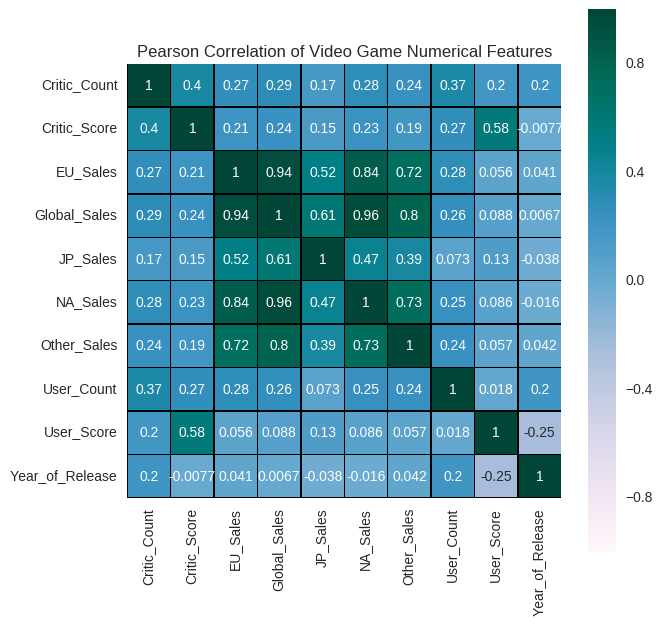

In [11]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in video.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = video.columns.difference(str_list) 
# Create Dataframe containing only numerical features
video_num = video[num_list]
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(video_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)

Cool. With this heatmap, the darker colors represent more postive correlations and vice-versa. Therefore, we can already see quite logical connections like "Global_Sales" being very positively correlated to "EU_Sales" etc. Just some interesting things so far. 

# 7th GENERATION CONSOLE WAR 

#Tale of the tape : PS3 vs XBOX360 vs Wii

Onto our first event of the evening, I'll provide some visualisations and summary statistics on the 7th Gen Console wars fought between the 3 main parties alluded to above. First, I will create a dataframe ("video7th") to contain only these 7th Gen consoles and then it's time to do some data poking and looking-around

In [12]:
# Dataframe contain info only on the 7th Gen consoles
video7th = video[(video['Platform'] == 'Wii') | (video['Platform'] == 'PS3') | (video['Platform'] == 'X360')]
video7th.shape

(2106, 16)

### GLOBAL SALES OVER THE YEARS

First let's look at these console's global sales over the years and see if we can identify any which left with bragging rights.
To do so, I shall aggregate the data via a "groupby" call on the Year_of_Release and "Platform" and then sum the Global_Sales. For visualisation, I will plot stacked barplots and hopefully this will be intuitive enough

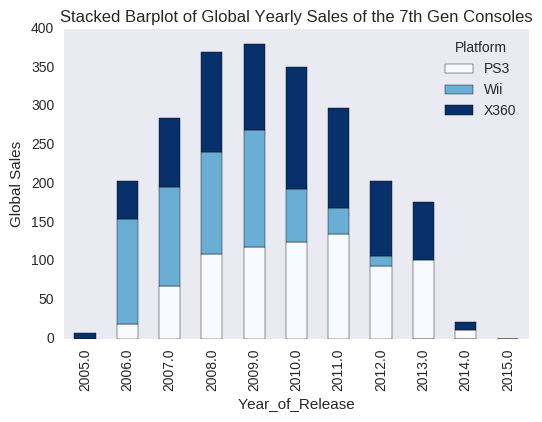

In [13]:
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

First Impressions : Seems the PS3 sales went from strength to strength , XB360 sales (bar a dip in 2009) also generally increased while the Wii sales, which had a strong headstart in the early years of 2006 and 2007 had it's lead eroded by the other 2.

### SALES AGGREGATED BY VIDEO GAME RATINGS

Here, I will take a look at the different video game ratings (i think its E : Everyone, M: Mature, T: Teens) and look at how many sales each of the 3 consoles made

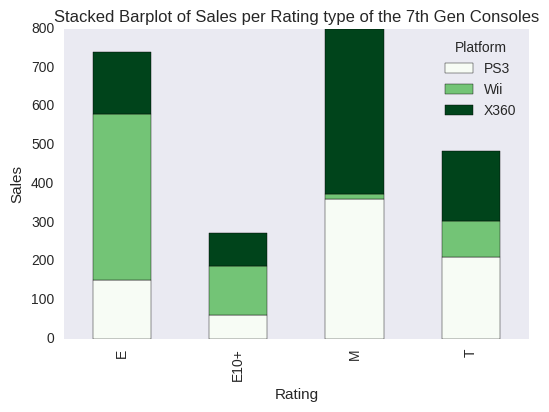

In [14]:
ratingSales = video7th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')

First Impressions : Well not much surprise here as we know that the Wii primarily catered to family-oriented fun and therefore it made the largest sales at Rating E for Everyone while it sold negligible M for Mature games. On the other hand, the PS3 and XB360 sold the most M-rated games, something also pretty obvious from both their plethora of shooters, sandbox games and hacking/slashing games. Heck Yeahhhhh!!!

### SALES BY GENRE

Finally, let's drill down into the data even further and look at the sales made by the 3 consoles and look at what kind of Genre games defined each console and what differentiated one console from the other. To do, I will aggregate the data via a "groupby" call on the Genre feature and Platform. The resultant plot is as follows:

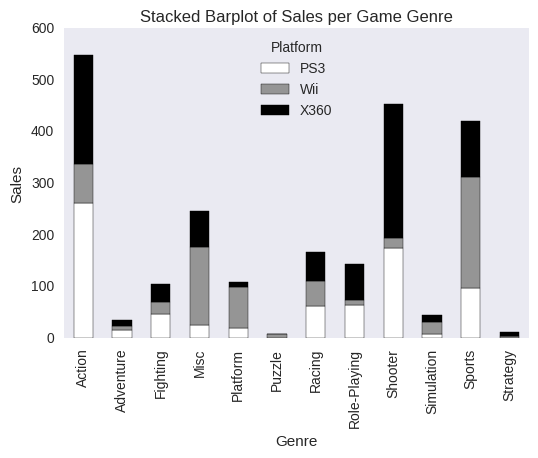

In [15]:
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

First Impressions : It seems that for both the PS3 and XB360, their 2 main genres were Action and Shooter games which as we know was the case as they appeal more to the hardcore, action-oriented gamer. The Wii on the other hand, focused on the genre of Sports, Platformers as well as some other Misc games.

### TOTAL SALES AND TOTAL USERS

Finally let us look at pie chart visualisations of the total number of Global Sales and total number of users attributed to each of the 3 consoles. The way I am going to present this is to simply add up the Global sales and number of users value for all games. Therefore as a caveat, take the numbers and visualisation with a pinch of salt as this output will be dependent on whether the original dataset was fully inclusive in the first instance.

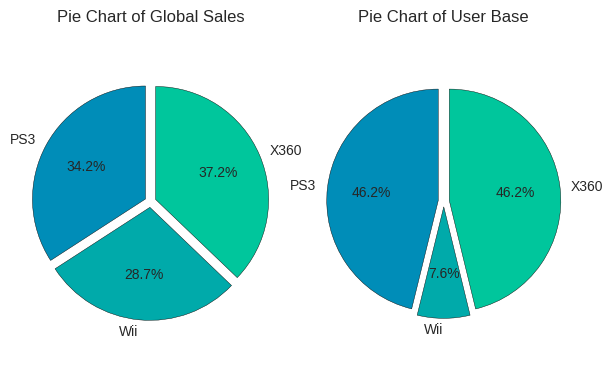

In [16]:
# Plotting our pie charts
# Create a list of colors 
colors = ['#008DB8','#00AAAA','#00C69C']
plt.subplot(121)
plt.pie(
   video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')
plt.subplot(122)
plt.pie(
   video7th.groupby('Platform').User_Count.sum(),
    labels=video7th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()

**Concluding Remarks** 

From the pie charts above as well as the earlier barplots, it seems that both the PS3 and the XB360 were very evenly matched, with the XB360 having the slight edge in global sales. What is obvious is that from these metrics alone, the showing from the Wii could not compete against its other 2 competitors. 

# WINNER : PS3 & XB360 (Two-way Tie)

---

# 8th GENERATION CONSOLE WAR 

### Tale of the tape : PS4 vs XBOXONE vs WiiU

Onto our second event of the evening and as per the earlier sections,  I'll provide some visualisations and summary statistics on the 8th Gen Console wars. First up, I will create a dataframe ("video8th") to only contain data pertaining to these 3 particular consoles:

In [17]:
video8th = video[(video['Platform'] == 'WiiU') | (video['Platform'] == 'PS4') | (video['Platform'] == 'XOne')]
video8th.shape

(487, 16)

### GLOBAL SALES OVER THE YEARS

Following our approach with the 7th Gen data, let's first have a high-level grasp of the sales performance of these 8th Gen games over the years. Therefore I shall once again aggregate the data via a "groupby" call on the Year_of_Release and "Platform" and then sum the Global_Sales with stacked barplots for visualisation.

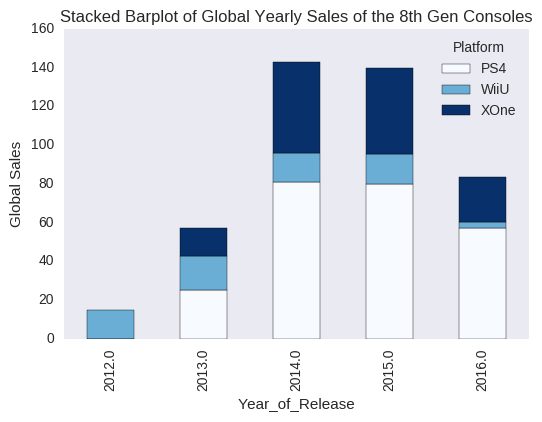

In [18]:
yearlySales = video8th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the 8th Gen Consoles')
plt.ylabel('Global Sales')

First Impression : It is obvious just by one look that the PS4 global sales exceed those of BOTH the WiiU and XOne combined. This is a very marked deviation from its predecessor's performance in the 7th Gen when the PS3 and XB360 where neck to neck in sales performance over the years. So how can be explain this dominance this time round?

### SALES AGGREGATED BY VIDEO GAME RATINGS

Well let's boil our analysis down even further to see if we can investigate this PS4 dominance. Let's look at what kind of audiences (hence looking at the Ratings) these consoles catered their games to

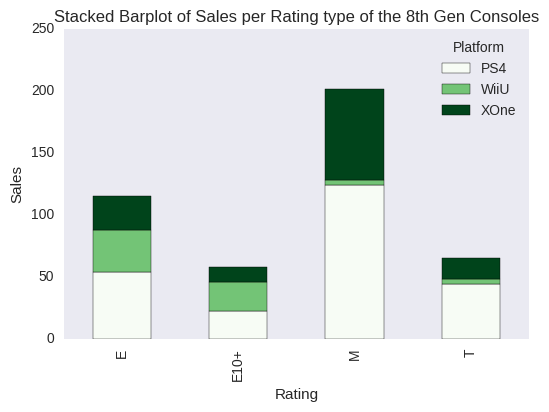

In [19]:
ratingSales = video8th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 8th Gen Consoles')
plt.ylabel('Sales')

First Impression : An Interesting result this time round. Unlike the 7th Gen where there was a clear demarcation in the sense that the PS3 and XB360 produced games primarily for the M for Mature audience while the Wii was for the E for Everyone audience, it seems that the PS4 has decided to cater ( or has somehow appealed more) to both the M and E audience. This could explain their earlier dominance in global sales as they are now taking up both the hardcore gaming audience as well as the casual, family-friendly audience.

### SALES BY GENRE

Finally, let's look at the breakdown by Genre via an aggregation the data with a "groupby" call on the Genre feature and Platform. The resultant plot is as follows:

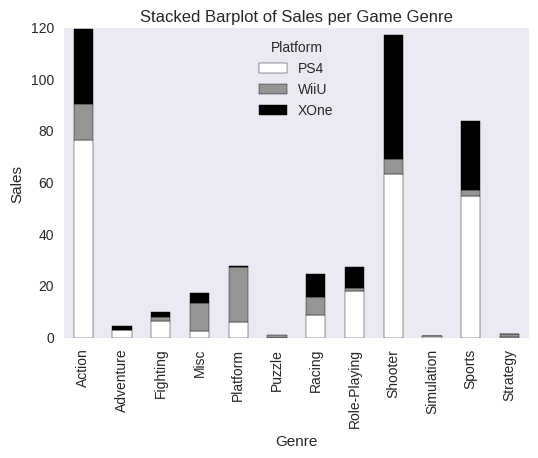

In [20]:
genreSales = video8th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

First Impression : Again, this plot is very telling in the sense that the PS4 is clearly trying to gain an inroad into more genres than its predecessor, the PS3. Just from a quick visual glance, one can observe that the PS4 already has the majority of sales in 7 out of 12 of the genres ( 4 out of 12 for the PS3).

### TOTAL SALES AND TOTAL USERS

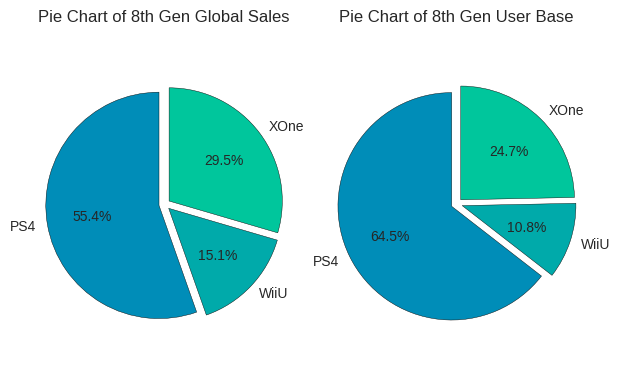

In [21]:
# Plotting our pie charts
# Create a list of colors 
colors = ['#008DB8','#00AAAA','#00C69C']
plt.subplot(121)
plt.pie(
   video8th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video8th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen Global Sales')
plt.subplot(122)
plt.pie(
   video8th.groupby('Platform').User_Count.sum(),
    labels=video8th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen User Base')
plt.tight_layout()
plt.show()

**Concluding Remarks** 

Unlike the 7th Gen consoles, we have a very clear leader for the 8th Gen consoles, and that would be the PS4, far outstripping the XBOXONE and the WiiU. Although this console war is far from over, it is undoubted that the PS4 has a very big headstart.

# WINNER : PS4 (so far)